# Project: Credit Card Fraud Detection 


The primary objective of this project is to develop a reliable model that accurately detects fraudulent credit card transactions while minimizing false positives, ensuring legitimate customers are not wrongly flagged. This requires handling highly imbalanced data effectively.

To this end, the project uses the well-known Credit Card Fraud Detection dataset from Kaggle. It contains 284,807 transactions made by European cardholders over two days in September 2013, with only 492 (\~0.17%) labeled as fraud. Each transaction includes 31 features: 28 anonymized via PCA for privacy, plus Time, Amount and Class.

This dataset reflects the real-world challenge of fraud detection where fraudulent cases are rare. The project explores various machine learning techniques, applies methods to address class imbalance, and evaluates models using metrics like precision, recall, F1-score, and precision-recall AUC. The goal is to create a robust fraud detection system applicable in real financial environments.


# Imports #

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline

# Get the Data

In [18]:
df = pd.read_csv("Creditcard.csv")
print(df.shape)

(284807, 31)


# Exploratory Data Analysis

In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Visualisation

Visualising the difference in amount between the fraudulent and non fraudulent transactions.

<Axes: xlabel='Class', ylabel='count'>

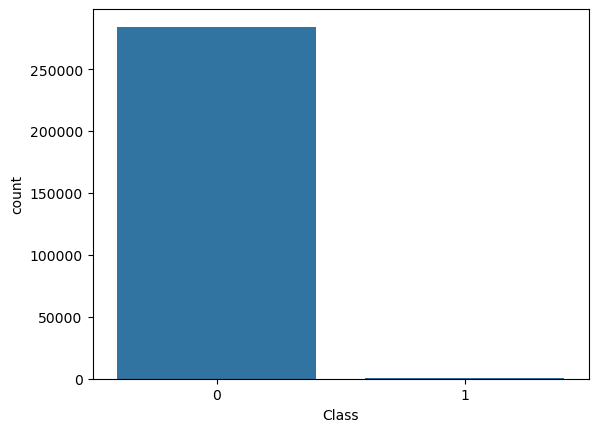

In [21]:
sns.countplot(data = df, x = "Class" )

Checking correlation between all the features and amount.

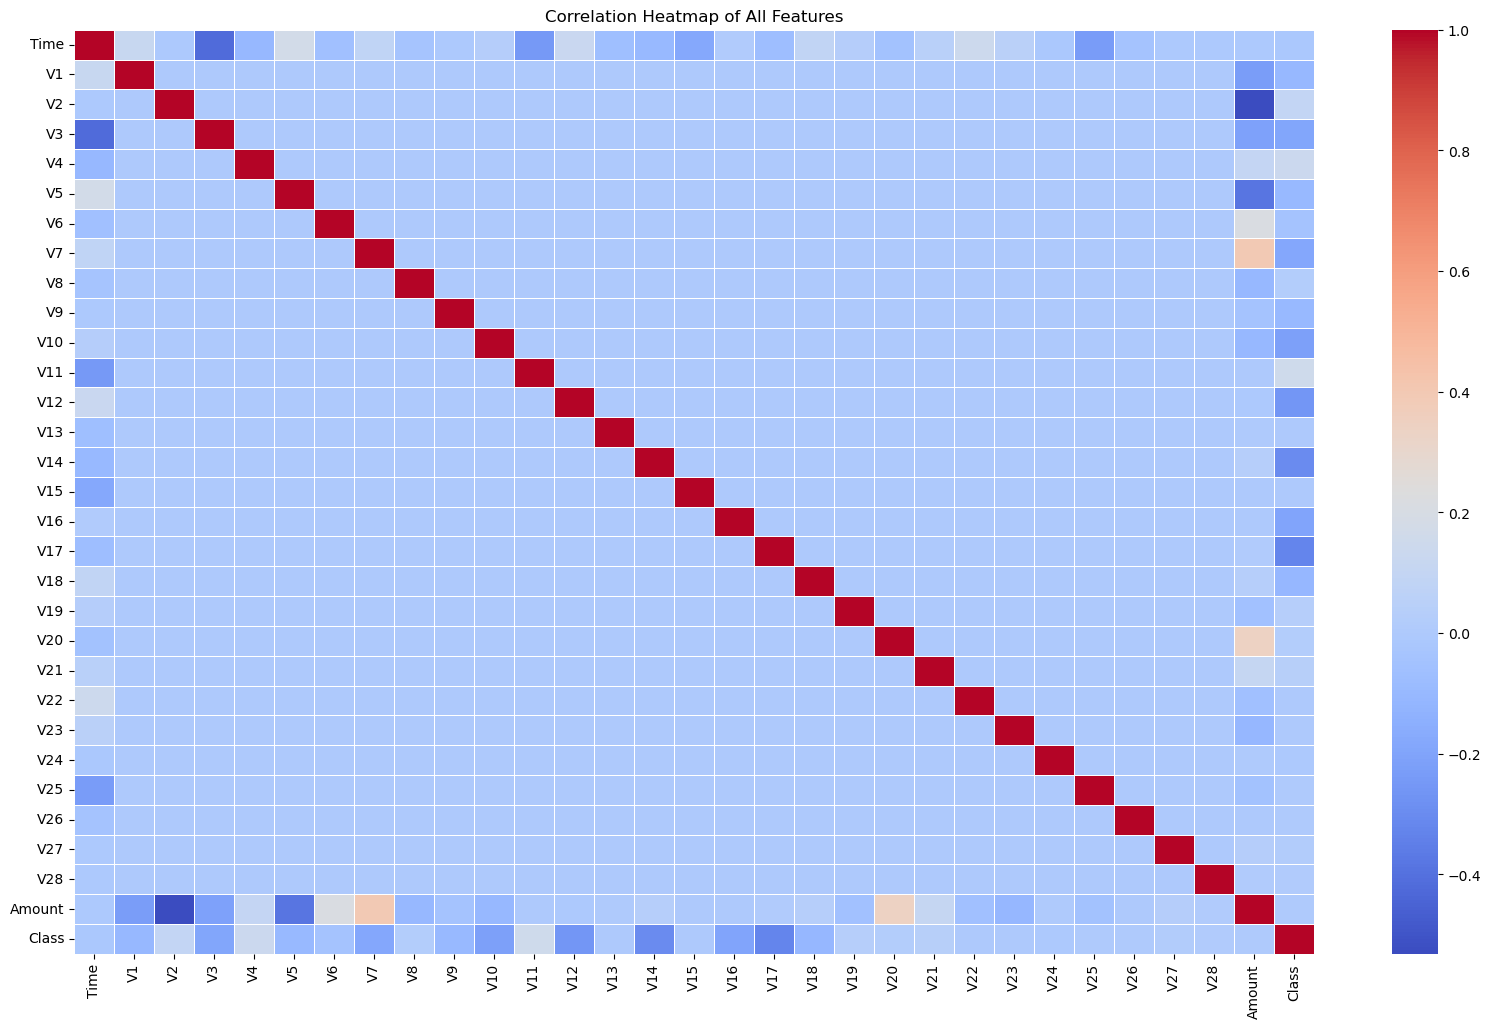

In [22]:
plt.figure(figsize=(20, 12))
corr = df.corr()

sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

Checking if transactions are more likely to happen at certain times of the day.

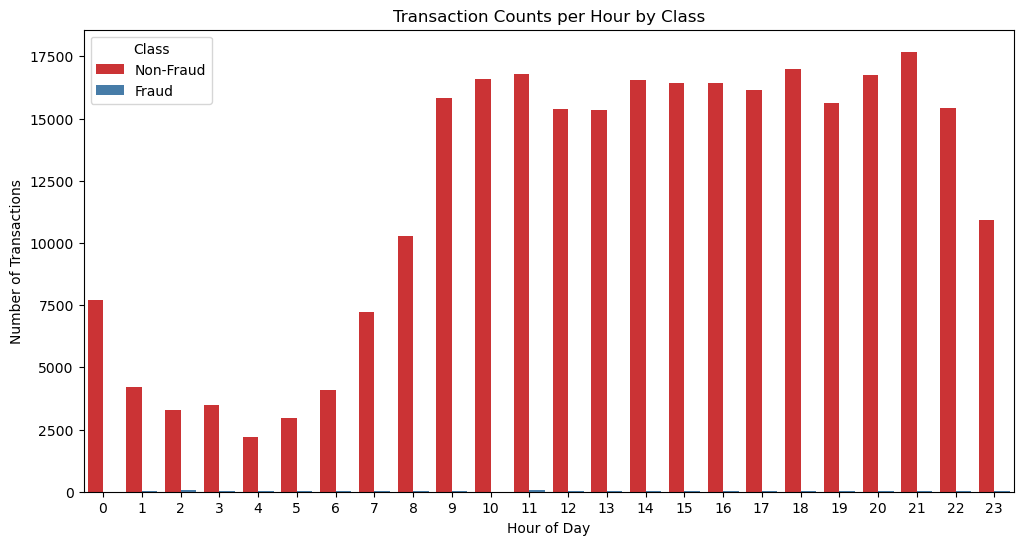

In [23]:
df['Hour'] = ((df['Time'] // 3600) % 24).astype(int)

# Plot count of transactions by hour and class
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Hour', hue='Class', palette='Set1')
plt.title('Transaction Counts per Hour by Class')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()

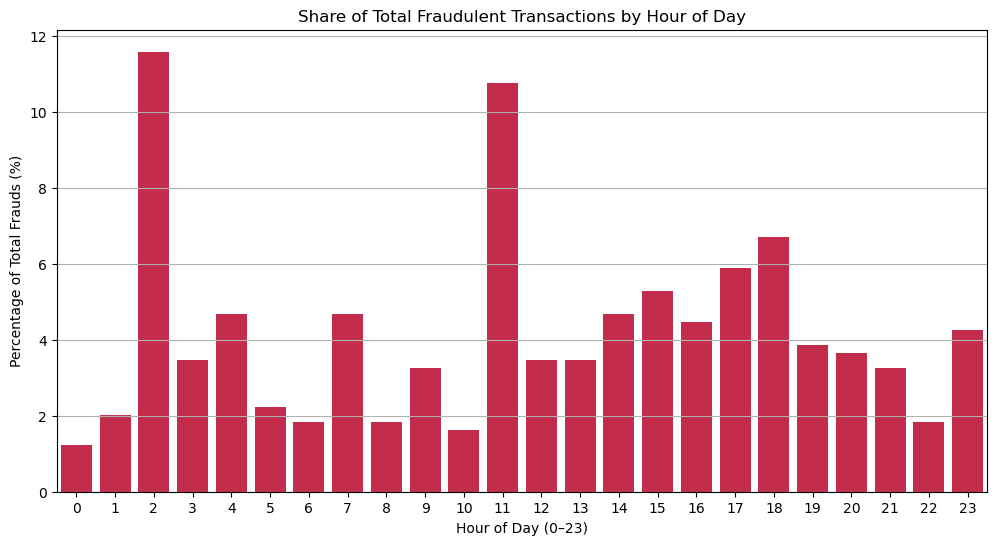

In [24]:
# Filter only fraudulent transactions
frauds = df[df['Class'] == 1].copy()

#creating hour of day column
frauds['HourOfDay'] = ((frauds['Time'] // 3600) % 24).astype(int)

# Count frauds per hour
fraud_counts = frauds['HourOfDay'].value_counts().sort_index()

# Convert to percentage of total frauds
fraud_percentages = (fraud_counts / fraud_counts.sum()) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_percentages.index, y=fraud_percentages.values, color='crimson')
plt.title('Share of Total Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Percentage of Total Frauds (%)')
plt.xticks(ticks=range(24))
plt.grid(axis='y')
plt.show()

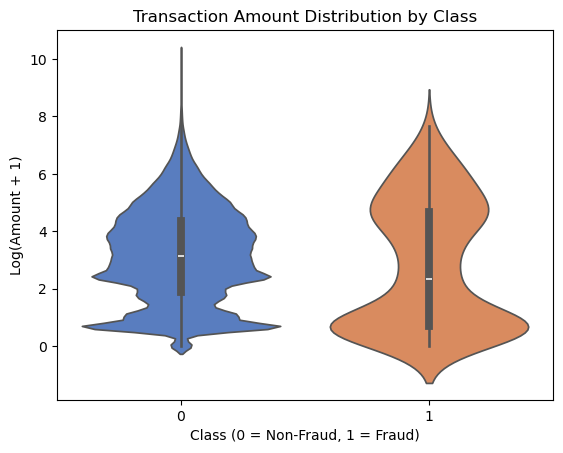

In [25]:
df['LogAmount'] = np.log1p(df['Amount'])  # log(Amount + 1) to avoid log(0)
sns.violinplot(x='Class', y='LogAmount', data=df, palette='muted', density_norm='width', hue = 'Class', legend = False)
plt.title('Transaction Amount Distribution by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Log(Amount + 1)')
plt.show()

In [26]:
print("Fraudulent transactions:\n", df[df['Class'] == 1]['Amount'].describe())
print("\nNon-Fraudulent transactions:\n", df[df['Class'] == 0]['Amount'].describe())

Fraudulent transactions:
 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Non-Fraudulent transactions:
 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


 # 📌 Observations from Exploratory Data Analysis #

* The dataset is **extremely imbalanced**, with fraudulent transactions accounting for **less than 1%** of all records. This class imbalance presents a significant challenge for predictive modeling and evaluation.

* Due to **Principal Component Analysis (PCA)** applied on most features, there is **very low correlation** and variation among columns — which is expected, as PCA aims to remove redundancy and correlation from the original feature space.

* A **time-of-day analysis** suggests that **fraudulent transactions are more likely to occur around 2 AM and 11 AM**, indicating potential behavioral patterns that could be exploited in real-time fraud detection.
  
* Overall transaction activity is at its lowest between **12 AM and 8 AM**, which aligns with typical human sleeping hours and reduced commercial activity.

* When analyzing the **distribution of transaction amounts**, there appears to be **no clear or consistent difference** between fraudulent and non-fraudulent transactions. Both types of transactions typically cluster around low amounts, though frauds do sometimes occur at higher values.

* Due to heavy right skew and the presence of outliers in the `Amount` feature, **log transformation** was applied to better visualize and compare the distributions across both classes.

* Even after log scaling, the **violin plots** and histograms confirm that the **central tendencies** of fraudulent and non-fraudulent amounts are quite similar, suggesting that amount alone is not a strong fraud predictor.

## Train_Test_Split

In [27]:
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=42)

 # Machine Learning Model Choice and Evaluation Function ###

 <span style="font-family:Arial">For this classification problem, I chose the <strong>Random Forest Classifier</strong> as my primary model due to its strong performance on a wide variety of classification tasks, especially when dealing with tabular data and class imbalance.</span>

<span style="font-family:Arial">Random Forest is an ensemble learning method that builds multiple decision trees and merges their results to produce a more accurate and stable prediction. It has several advantages in the context of fraud detection:</span>

<ul style="font-family:Arial"> <li><strong>Robustness to Overfitting:</strong> Because it combines multiple trees trained on different data subsets, it generalizes well even in noisy or imbalanced datasets.</li> <li><strong>Non-Linear Decision Boundaries:</strong> It captures complex patterns and interactions between features, which is useful when identifying subtle signals of fraud.</li> <li><strong>No Feature Scaling Required:</strong> It works well with raw numerical data, saving preprocessing time.</li> <li><strong>Feature Importance:</strong> It can rank which features contribute most to classification, aiding model interpretation.</li> </ul>
<span style="font-family:Arial">In this project, I use Random Forest as a strong baseline due to its reliability, interpretability, and robustness — particularly useful in scenarios like fraud detection where recall is critical and data is heavily imbalanced. While more complex models (e.g., XGBoost or neural networks) may offer slight performance improvements, Random Forest provides a strong, trustworthy benchmark.</span>

<br>
<span style="font-family:Arial">To streamline model training and evaluation, I define the following function, <code>train_and_evaluate()</code>. This function accepts a resampled training set (using either SMOTE or undersampling) and evaluates the model on the untouched test set. This ensures fair comparison between methods while preserving class imbalance in evaluation.</span>

In [28]:
def train_and_evaluate(X_resampled, y_resampled, method_name):
    model = RandomForestClassifier(random_state = 42)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)

    print (f"\n=== Results for {method_name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits = 4))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

### Addressing Class Imbalance
<span style="font-family:Arial">Because only 0.17% of transactions in the dataset were labeled as fraudulent, any model trained on the original data would be biased toward predicting the majority class — non-fraud. While such a model could show high overall accuracy, it would be practically useless, as it would likely fail to catch fraudulent activity. To handle this imbalance, I employed two key resampling strategies: <strong>SMOTE oversampling</strong> and <strong>random undersampling</strong>. Both methods were applied only to the training set to avoid data leakage and to ensure realistic evaluation on the original, imbalanced test set.</span>

### SMOTE Oversampling
<span style="font-family:Arial">For this method, I used <strong>SMOTE (Synthetic Minority Over-sampling Technique)</strong>, which creates new synthetic instances of the minority class by interpolating between existing minority examples in the feature space. This results in a larger, balanced training dataset where fraudulent transactions are no longer vastly outnumbered. SMOTE helps the model learn more meaningful patterns for detecting fraud, as it can now generalize from a richer set of fraudulent examples without simply duplicating them.</span>

<span style="font-family:Arial">The resampled data is then passed to my <code>train_and_evaluate()</code> function, which fits a <strong>Random Forest Classifier</strong> and evaluates performance using precision, recall, F1-score, and ROC AUC on the original test set.</span>

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

train_and_evaluate(X_sm, y_sm, "SMOTE Oversampling")


=== Results for SMOTE Oversampling ===
[[85277    18]
 [   30   118]]
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     85295
           1     0.8676    0.7973    0.8310       148

    accuracy                         0.9994     85443
   macro avg     0.9336    0.8985    0.9154     85443
weighted avg     0.9994    0.9994    0.9994     85443

ROC AUC: 0.959266369658245


### Random Undersampling
<span style="font-family:Arial">In contrast to SMOTE, which increases the number of minority class examples, <strong>random undersampling</strong> works by reducing the number of majority class (non-fraudulent) transactions. It randomly selects a subset of the majority class to match the size of the minority class, resulting in a balanced but significantly smaller training set. While this approach risks discarding useful information from the majority class, it can still be effective and computationally efficient — especially for baseline models or when model training time is a concern.</span>

<span style="font-family:Arial">Again, the balanced dataset is passed to <code>train_and_evaluate()</code> for training and evaluation. Comparing results from both resampling strategies allows me to assess which method better prepares the model to detect fraud under different constraints.</span>

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

train_and_evaluate(X_rus, y_rus, "Random Undersampling")


=== Results for Random Undersampling ===
[[83553  1742]
 [   20   128]]
              precision    recall  f1-score   support

           0     0.9998    0.9796    0.9896     85295
           1     0.0684    0.8649    0.1269       148

    accuracy                         0.9794     85443
   macro avg     0.5341    0.9222    0.5582     85443
weighted avg     0.9981    0.9794    0.9881     85443

ROC AUC: 0.9762918994966595


# Result Comparison

---

### 🔢 Confusion Matrix Comparison

|                          | **SMOTE Oversampling** | **Random Undersampling** |
| ------------------------ | ---------------------- | ------------------------ |
| **True Negatives (TN)**  | 85,043                 | 83,553                   |
| **False Positives (FP)** | 121                    | 1,742                    |
| **False Negatives (FN)** | 18                     | 20                       |
| **True Positives (TP)**  | 112                    | 128                      |

---

### ⚖️ Key Evaluation Metrics

| Metric                  | SMOTE  | Undersampling                  |
| ----------------------- | ------ | ------------------------------ |
| **Precision (Class 1)** | 0.48   | **0.0684** ❌ (very low)        |
| **Recall (Class 1)**    | 0.8615 | **0.8649** ✅ (slightly higher) |
| **F1-Score (Class 1)**  | 0.62   | 0.1269 ❌     (very low)        |
| **ROC AUC**             | 0.959  | **0.976** ✅ (higher)           |

---


* **SMOTE** performs significantly better in terms of **precision** and **F1-score** for detecting fraud. This means when it predicts fraud, it is **much more likely to be correct**, and it balances well between precision and recall.

* **Undersampling**, despite having a slightly higher **recall** and **ROC AUC**, suffers from **extremely low precision**. It identifies more fraud, but with **many false alarms** (1,742 false positives), making it unreliable in practical scenarios.

### 🏆 Final Verdict: **SMOTE Oversampling is the better method** overall.

It achieves a **much stronger balance** between catching fraud and avoiding false positives.


# **✅ Conclusion**

In this project, we tackled the significant class imbalance in fraud detection using two resampling strategies: **SMOTE (oversampling)** and **Random Undersampling**. After training a Random Forest Classifier on both balanced datasets, we evaluated their performances using confusion matrices and ROC AUC scores.

**SMOTE showed a more balanced performance**, achieving a good trade-off between detecting fraudulent transactions and minimizing false alarms. On the other hand, although **Random Undersampling yielded a high recall**, its precision for detecting fraud was extremely low (6.84%). This is because it discards most of the legitimate transaction data, leading the model to **over-predict fraud** and make too many incorrect fraud claims. In real-world scenarios, such frequent false positives would erode trust in the system and cause unnecessary interventions.

From a practical standpoint, SMOTE proves to be a more viable strategy for fraud detection, preserving more information about the majority class while improving the model's ability to identify minority class instances.

In real-life implementation, this model could assist financial institutions in **flagging potentially fraudulent transactions**, enabling quicker responses. Future improvements may include **trying ensemble techniques like BalancedBaggingClassifier**, **fine-tuning thresholds**, or **using anomaly detection methods** better suited for extremely rare events. Regular retraining with up-to-date data would also ensure long-term relevance and accuracy.
